In [2]:
import re
import string

import numpy as np
import pandas as pd
from pathlib import Path
from unidecode import unidecode

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv(Path('DadosPortarias'))

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        5410 non-null   int64 
 1   interessado       5410 non-null   object
 2   textoConsolidado  5410 non-null   object
 3   dataEfetiva       5410 non-null   object
 4   assunt            5397 non-null   object
 5   matricula         5410 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 253.7+ KB


In [41]:
df.head()

,Unnamed: 0,interessado,textoConsolidado,dataEfetiva,assunt,matricula
0,0,REITORIA E MSM ENGENHARIA,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,2022-08-30 00:00:00-03:06,GENÉRICA FISCAL DE CONTRATO,1202064
1,1,REITORIA E MSM ENGENHARIA,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,2022-08-30 00:00:00-03:06,GENÉRICA FISCAL DE CONTRATO,2030736
2,2,REITORIA E MSM ENGENHARIA,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,2022-08-30 00:00:00-03:06,GENÉRICA FISCAL DE CONTRATO,1816562
3,3,REITORIA E MSM ENGENHARIA,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,2022-08-30 00:00:00-03:06,GENÉRICA FISCAL DE CONTRATO,1941681
4,4,REITORIA E MSM ENGENHARIA,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,2022-08-30 00:00:00-03:06,GENÉRICA FISCAL DE CONTRATO,271323


In [42]:
df.drop('dataEfetiva', axis=1, inplace=True)
df.drop('interessado', axis=1, inplace=True)
df.drop('matricula', axis=1, inplace=True)


In [43]:
df.head()

,Unnamed: 0,textoConsolidado,assunt
0,0,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,GENÉRICA FISCAL DE CONTRATO
1,1,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,GENÉRICA FISCAL DE CONTRATO
2,2,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,GENÉRICA FISCAL DE CONTRATO
3,3,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,GENÉRICA FISCAL DE CONTRATO
4,4,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,GENÉRICA FISCAL DE CONTRATO


In [44]:
df["texto"] = df["textoConsolidado"] + df["assunt"]
df.drop('textoConsolidado', axis=1, inplace=True)
df.drop('assunt', axis=1, inplace=True)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5410 non-null   int64 
 1   texto       5397 non-null   object
dtypes: int64(1), object(1)
memory usage: 84.7+ KB


In [46]:
df.head()

,Unnamed: 0,texto
0,0,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...
1,1,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...
2,2,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...
3,3,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...
4,4,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...


In [47]:
df["texto"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5405    False
5406    False
5407    False
5408    False
5409    False
Name: texto, Length: 5410, dtype: bool

In [48]:
df[df["texto"].isna()]


,Unnamed: 0,texto
951,951,NaN
952,952,NaN
953,953,NaN
1583,1583,NaN
1584,1584,NaN
1585,1585,NaN
1586,1586,NaN
1587,1587,NaN
1588,1588,NaN
1589,1589,NaN


In [49]:
df.dropna(subset=['texto'],inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5397 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5397 non-null   int64 
 1   texto       5397 non-null   object
dtypes: int64(1), object(1)
memory usage: 126.5+ KB


In [51]:
df["texto"] = df['texto'].str.lower()
df.head()

,Unnamed: 0,texto
0,0,ministério da educação secretaria de educação ...
1,1,ministério da educação secretaria de educação ...
2,2,ministério da educação secretaria de educação ...
3,3,ministério da educação secretaria de educação ...
4,4,ministério da educação secretaria de educação ...


In [52]:
# Remoção de pontuação e símbolos

# Tabela de pontuação
punctuation = string.punctuation
# Criar tabela de tradução que susbstituirá toda ponutação por um espaço em branco
trantab = str.maketrans(punctuation, len(punctuation)*' ')
# Traduzir nosso exemplo
df["texto"] = df['texto'].str.translate(trantab)

df.head()


,Unnamed: 0,texto
0,0,ministério da educação secretaria de educação ...
1,1,ministério da educação secretaria de educação ...
2,2,ministério da educação secretaria de educação ...
3,3,ministério da educação secretaria de educação ...
4,4,ministério da educação secretaria de educação ...


In [53]:
df['texto']=[unidecode(x) for x in df['texto']]
df.head()

,Unnamed: 0,texto
0,0,ministerio da educacao secretaria de educacao ...
1,1,ministerio da educacao secretaria de educacao ...
2,2,ministerio da educacao secretaria de educacao ...
3,3,ministerio da educacao secretaria de educacao ...
4,4,ministerio da educacao secretaria de educacao ...


In [54]:
df['texto'][0]

'ministerio da educacao secretaria de educacao profissional e tecnologica instituto federal de educacao  ciencia e tecnologia de goias reitoria portaria no 2244   reitoria ifg  de 30 de agosto de 2022 a reitora do instituto federal de educacao  ciencia e tecnologia de goias  ifg    nomeada por decreto presidencial de 5 de outubro de 2021  publicado no diario oficial da uniao de 6 10 2021  no uso de suas atribuicoes legais e regimentais  considerando o que consta no processo no 23372 002069 2022 69   resolve  art  1o designar como fiscais os servidores  conforme se segue  de acordo com o previsto no art  67 da lei no 8 666  de 21 de junho de 1993  e legislacao correlata  na instrucao normativa seges mpdg no 5  de 25 de maio de 2017  para gerenciarem  acompanharem e fiscalizarem a execucao e o adequado cumprimento das clausulas estabelecidas no contrato no 16 2022  celebrado entre o a  reitoria e a empresa msm engenharia ltda   cnpj  37 320 553 0001 31  cujo objeto e a realizacao de obra

In [55]:
# Remover dígitos

def remove_digits(input_text):
    import re
    return re.sub('\d+', '', input_text)

df['texto']=[remove_digits(x) for x in df['texto']]
df['texto'][0]


'ministerio da educacao secretaria de educacao profissional e tecnologica instituto federal de educacao  ciencia e tecnologia de goias reitoria portaria no    reitoria ifg  de  de agosto de  a reitora do instituto federal de educacao  ciencia e tecnologia de goias  ifg    nomeada por decreto presidencial de  de outubro de   publicado no diario oficial da uniao de     no uso de suas atribuicoes legais e regimentais  considerando o que consta no processo no       resolve  art  o designar como fiscais os servidores  conforme se segue  de acordo com o previsto no art   da lei no    de  de junho de   e legislacao correlata  na instrucao normativa seges mpdg no   de  de maio de   para gerenciarem  acompanharem e fiscalizarem a execucao e o adequado cumprimento das clausulas estabelecidas no contrato no    celebrado entre o a  reitoria e a empresa msm engenharia ltda   cnpj        cujo objeto e a realizacao de obras de execucao dos projetos de prevencao e combate a incendio e panico   ppcip d

In [56]:
# Remover stopwords

try:
    stopwords_list = stopwords.words('portuguese')
except:
    nltk.download('stopwords')
    stopwords_list = stopwords.words('portuguese')



In [57]:
newStopWords=['diario','publicado','presidencial','decreto','reitora','educacaosecretaria','ministerio','educacao','secretaria', 'profissional','tecnologica', 'tecnologicainstituto', 'federal', 'ciencia', 'tecnologia', 'goiasreitoriaportaria', 'goias', 'reitoria', 'portaria', 'ifg', 'instituto', 'oficial', 'uniao', 'atribuicoes', 'legais', 'regimentais'] 
stopwords_list.extend(newStopWords)

In [58]:
def remove_stopwords(input_text, stopwords_list):
    words = input_text.split()
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 1]
    return " ".join(clean_words)

df['texto'] = [remove_stopwords(x, stopwords_list) for x in df['texto']] 
df['texto'][0]

'agosto nomeada outubro uso considerando consta processo resolve art designar fiscais servidores conforme segue acordo previsto art lei junho legislacao correlata instrucao normativa seges mpdg maio gerenciarem acompanharem fiscalizarem execucao adequado cumprimento clausulas estabelecidas contrato celebrado empresa msm engenharia ltda cnpj cujo objeto realizacao obras execucao projetos prevencao combate incendio panico ppcip campus aparecida goiania formosa jatai luziania valparaiso conforme detalhamento seguir item referente campus aparecida goiania titular funcao matricula siape raissa regis silva gestor erique souza zanon fiscal tecnico titular cesar oliveira guimaraes fiscal tecnico substituto rodrigo souza arantes fiscal administrativo item referente campus formosa titular funcao matricula siape ricardo noronha tristao gestor erique souza zanon fiscal tecnico titular cesar oliveira guimaraes fiscal tecnico substituto milton pereira neves filho fiscal administrativo item referente

In [59]:
# Radicalização
#def stemming(input_text):
#    porter = PorterStemmer()
#    words = input_text.split()
#    stemmed_words = [porter.stem(word) for word in words]
#    return " ".join(stemmed_words)
#example = stemming(example)
#print(example)

In [87]:
# O TF-IDF

# Instanciar o vetorizador do sklearn
tfv = TfidfVectorizer(binary=True)
# Ajustar os pesos e fazer a transformação do corpus para a representação TF-IDF
tfidf = tfv.fit_transform(df['texto'])


tfidf = pd.DataFrame.sparse.from_spmatrix(tfidf, columns=tfv.get_feature_names())
tfidf.shape

c:\Users\PC GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(5397, 3974)

In [94]:
# O TF-IDF

# Instanciar o vetorizador do sklearn
tfv = TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_df=0.9)
# Ajustar os pesos e fazer a transformação do corpus para a representação TF-IDF
tfidf = tfv.fit_transform(df['texto'])


tfidf = pd.DataFrame.sparse.from_spmatrix(tfidf, columns=tfv.get_feature_names())
tfidf.shape


c:\Users\PC GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(5397, 14750)

In [62]:
#IMPORTANTE
# O TfidfVectorizer() se ajusta ao corpus, logo, deve ser ajustado nos dados de treino e no momento de codificar os dados de teste ou na inferência
# usar apenas a chamada tfv.transform(test)


In [63]:
#Definir o rótulo de cada portaria
cat = pd.read_csv(Path('Categorias2.csv'))
cat.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   categoria  80 non-null     object
 1   texto      80 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [64]:
cat["texto"] = cat['texto'].str.lower()
# Remoção de pontuação e símbolos
# Traduzir nosso exemplo
cat["texto"] = cat['texto'].str.translate(trantab)

cat['texto']=[unidecode(x) for x in cat['texto']]
cat['texto']=[remove_digits(x) for x in cat['texto']]

cat['texto'] = [remove_stopwords(x, stopwords_list) for x in cat['texto']] 

In [109]:
#Pegar dicionario
tfv = TfidfVectorizer(binary=True)
# Ajustar os pesos e fazer a transformação do corpus para a representação TF-IDF
temp = tfv.fit_transform(df['texto'])

#temp = pd.DataFrame.sparse.from_spmatrix(temp, columns=tfv.get_feature_names())
#temp['abadia'][15]

c:\Users\PC GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0

In [80]:
set1=tfv.get_feature_names()

c:\Users\PC GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [67]:
len(set1)

3974

In [76]:
tfv.get_feature_names()

c:\Users\PC GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abadia',
 'abadio',
 'abastecimento',
 'abc',
 'abdala',
 'abdalla',
 'abec',
 'aberta',
 'abilio',
 'abimael',
 'abishai',
 'abnner',
 'abono',
 'abrantes',
 'abrao',
 'abreu',
 'abril',
 'academica',
 'academicas',
 'academico',
 'academicos',
 'acao',
 'aceleracao',
 'acessibilidade',
 'acesso',
 'acessorios',
 'aciole',
 'acoes',
 'acompanhamento',
 'acompanhando',
 'acompanhar',
 'acompanharem',
 'acordo',
 'acordos',
 'adad',
 'adalberto',
 'adao',
 'adapatacoes',
 'adaptacao',
 'adaptacoes',
 'adauto',
 'adel',
 'ademar',
 'adequacao',
 'adequacoes',
 'adequado',
 'aderito',
 'adicionais',
 'adicional',
 'adilson',
 'adjudicadas',
 'adjunta',
 'adjunto',
 'adm',
 'administraao',
 'administracao',
 'administrador',
 'administradora',
 'administrar',
 'administrativa',
 'administrativas',
 'administrativo',
 'administrativos',
 'admitida',
 'admprf',
 'adolfo',
 'adorno',
 'adotante',
 'adria',
 'adriam',
 'adriana',
 'adriane',
 'adriano',
 'adrielly',
 'adultos',
 'aelton',
 '

In [110]:
#Análise de intersecção
#Pegar dicionario
tfv2 = TfidfVectorizer()
# Ajustar os pesos e fazer a transformação do corpus para a representação TF-IDF
temp2 = tfv2.fit_transform(cat['texto'])

#temp2 = pd.DataFrame.sparse.from_spmatrix(temp2, columns=tfv2.get_feature_names())
#temp2

In [70]:
set2=tfv2.get_feature_names()
set2

['aberta',
 'academica',
 'academico',
 'acompanhamento',
 'acompanharem',
 'adjunta',
 'administrativo',
 'administrativos',
 'adultos',
 'alteracao',
 'alterar',
 'assessoramento',
 'assistencia',
 'atualizacao',
 'atualizar',
 'autodeclarados',
 'avaliacao',
 'banca',
 'base',
 'bens',
 'biosseguranca',
 'brasil',
 'campus',
 'candidatos',
 'captacao',
 'cargos',
 'carreira',
 'casep',
 'ce',
 'cel',
 'central',
 'centro',
 'cep',
 'cgsic',
 'cgti',
 'cientifica',
 'cientificos',
 'cis',
 'citelab',
 'classe',
 'comissao',
 'comissoes',
 'comite',
 'comporem',
 'comunicacoes',
 'concurso',
 'conducao',
 'conepex',
 'conselho',
 'conservacao',
 'consup',
 'contrato',
 'controles',
 'coordenacao',
 'cpa',
 'cpgpd',
 'cppd',
 'cppir',
 'criacao',
 'curso',
 'dados',
 'departamental',
 'desfazimento',
 'designar',
 'didaticos',
 'diretor',
 'discente',
 'disciplinar',
 'docente',
 'edital',
 'egressos',
 'elaboracao',
 'elaborar',
 'eleitorais',
 'ensino',
 'erica',
 'escritorio',
 'esp

In [71]:
len(set2)

196

In [72]:
len(set(set2).difference(set(set1)))

20

In [73]:
#Definir label dos dados
#1Gerar TF-IDF das portarias de forma binária
#2Aplicar o transform para os dados de categorias
#3Rotular as portarias multiplicando portaria por categorias e atribuindo o rótulo com maior valor de multiplicação. Importante, categorias com vetorezes zerados já recebem categoria N

KeyError: '...'

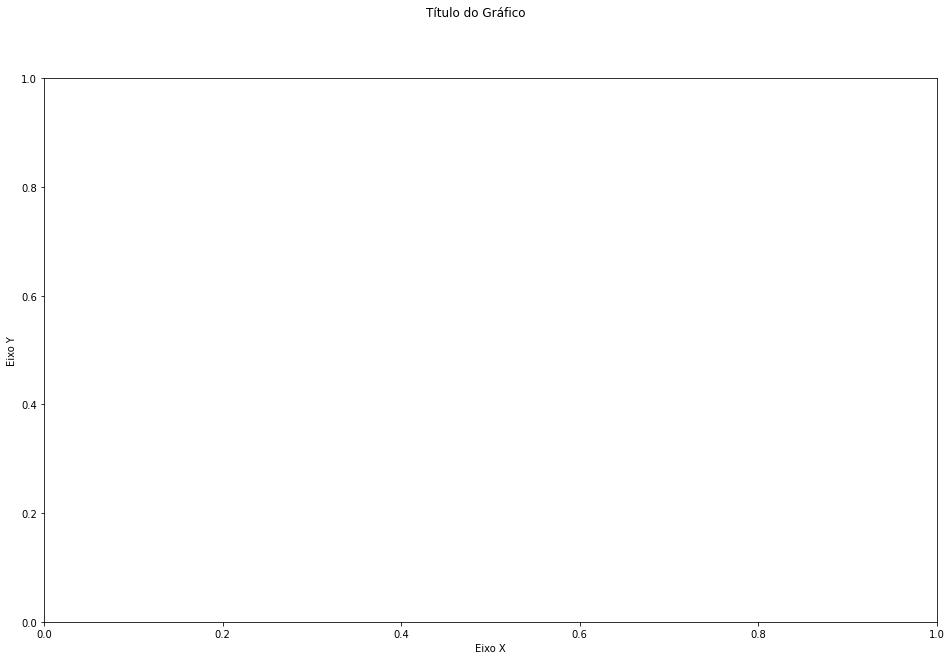

In [74]:
#Crie um hitograma mostrando a variação no tamanho de cada portaria. 
#https://github.com/hundredblocks/ml-powered-applications/blob/master/notebooks/dataset_exploration.ipynb
fig = plt.figure(figsize=(16,10))
fig.suptitle("Título do Gráfico")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
q_len = plt.hist(df["..."],  bins=1000,log=False)


In [ ]:
#Mostrar um histograma por categoria para análise de balanceamento

In [ ]:
#Motrar Gráfico UMPA: Dados por Categoria usando rótulos
#https://github.com/hundredblocks/ml-powered-applications/blob/master/notebooks/vectorizing_text.ipynb

In [ ]:
#Mostrar Gráfico Clustering: Dados em clusters NClusters = #Categorias
#https://github.com/hundredblocks/ml-powered-applications/blob/master/notebooks/clustering_data.ipynb